In [73]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.colors as mcolors
from scipy.stats import bootstrap
import random as rd
from file_helper import load_all_files, create_prefix_from_list
from distutils.spawn import find_executable
from itertools import cycle
import os
import pickle as pk
from statistic.generate_statistics import genSstat, get_ranking_results, reject_if_bad_test
from plotting import plot_stat, put_plot_rank, get_color
from test_distribution import float_to_print
from table_helper import build_latex_table

In [92]:
path_dir = 'results'


power_base = 10
U = power_base**power_base
m_per_splits = 10000
init_e = 0.05
init_b = 0.5
splits = 10
S = 4
ratio = 5
distribution_type = 'STAIRS'  # STAIRS
TYPE = 'SHARP'
experiment = "SYNTH"
prefix = create_prefix_from_list(
        {'exp': experiment+TYPE, 'U': U, 'm_per_splits': m_per_splits, 'splits': splits, 'S': S, 'ratio': ratio, 'b': init_b, 'e': init_e})      
list_files = load_all_files(path_dir)
file_to_load = prefix

for file in list_files:
    file_name = file.split('.pk')[0]
    
    if file_to_load in file_name:
        print('found')
        with open(os.path.join(path_dir, file), 'rb') as f:  # load the data
                data = pk.load(f)
                data = data['data']

found


In [93]:
data.keys()

dict_keys(['S', 'test', 'binning', 'A', 'nll', 'e', 'std_nll', 'l1'])

In [94]:
list_of_title_q = list(data['A'].keys())

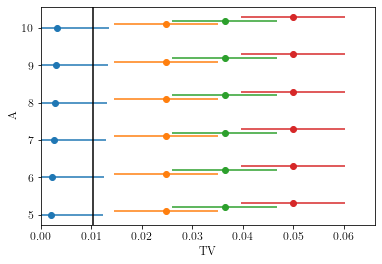

In [95]:
maxvalue = 0
for q_index, q_name in enumerate(list_of_title_q):
    
    emp_l1_for_all_B = data['A'][q_name]
    for B, A_trials in emp_l1_for_all_B.items():
       
        x = [np.mean(A_trials)]
        y = [B+q_index*0.1]         
        errors = np.mean(data['e'][q_name][B])
        
        plt.errorbar(x, y, xerr=errors, fmt = 'o', color=get_color(q_index))
        maxvalue = max(maxvalue, (x+errors)*1.1)
plt.axvline(x=errors, color='k')
plt.xlim((0,maxvalue))
plt.ylabel('A')
plt.xlabel('TV')
plt.savefig(file_to_load+'A.pdf')
plt.show()
# print(q_index)
# print(len(list_of_title_q))
# y_positions = [i for i in range(q_index+1)]
# plt.yticks(y_positions, ['']+list_of_title_q+['']) 

# # plt.savefig(file_to_load+'A.pdf')
# plt.show()

In [96]:
def format_name(q_name):
    epsilon = q_name.split(' ')[1]
    string = '$q_{{{:.2f}}}$'.format(float(epsilon))
    return string
rows = []
for q_name in list_of_title_q:
#     values = [float_to_print(np.mean(data['nll'][q_name])) +
#               '$\pm$' + float_to_print(data['std_nll'][q_name])
    values = [float_to_print(np.mean(data['nll'][q_name])) ]
    for key, val in data['A'][q_name].items():
        #std = np.mean((store_results['e'][q_name][key]))
        std = np.std(val)

#         values.append(float_to_print(np.mean(val)) +
#                       '$\pm$' + float_to_print(std))
        values.append(float_to_print(np.mean(val)))
        # values.append(float_to_print(np.mean(store_results['l1'][q_name][key])))
    rows.append([format_name(q_name)] + values)
top = [''] + ['nll']
for B in data['A'][q_name].keys():
    top = top + ['$B_'+str(B)+'$']
    #top = top + [ '$tv$']
build_latex_table([top]+rows, caption=TYPE + '$\Omega$=' +str(U)+ " m="+ str( m_per_splits*splits)+ ' S:'+str(S), label=prefix)

              nll     $B_5$   $B_6$   $B_7$   $B_8$   $B_9$   $B_10$
$q_{0.00}$   22.789   0.002   0.002   0.003   0.003   0.003   0.003 
$q_{0.05}$   22.795   0.025   0.025   0.025   0.025   0.025   0.025 
$q_{0.07}$   22.802   0.036   0.036   0.036   0.036   0.036   0.036 
$q_{0.10}$   22.812   0.050   0.050   0.050   0.050   0.050   0.050 

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{lccccccc}
			 & nll & $B_5$ & $B_6$ & $B_7$ & $B_8$ & $B_9$ & $B_10$ \\
			\hline
			$q_{0.00}$ & 22.789 & 0.002 & 0.002 & 0.003 & 0.003 & 0.003 & 0.003 \\
			$q_{0.05}$ & 22.795 & 0.025 & 0.025 & 0.025 & 0.025 & 0.025 & 0.025 \\
			$q_{0.07}$ & 22.802 & 0.036 & 0.036 & 0.036 & 0.036 & 0.036 & 0.036 \\
			$q_{0.10}$ & 22.812 & 0.050 & 0.050 & 0.050 & 0.050 & 0.050 & 0.050 \\
		\end{tabular}
	\end{center}
	\caption{SHARP$\Omega$=10000000000 m=100000 S:4}
	\label{exp:SYNTHSHARP_U:10000000000_m_per_splits:10000_splits:10_S:4_ratio:5_b:0.50_e:0.05}
\end{table}
